<a href="https://colab.research.google.com/github/Lightola/light-wprk/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT 4 CUSTOMER SEGMENTS USING MAIL DATA**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# Display first few rows
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Rename columns if needed
data.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

In [ ]:
# Select features for clustering
X = data[['Age', 'Annual Income', 'Spending Score']]

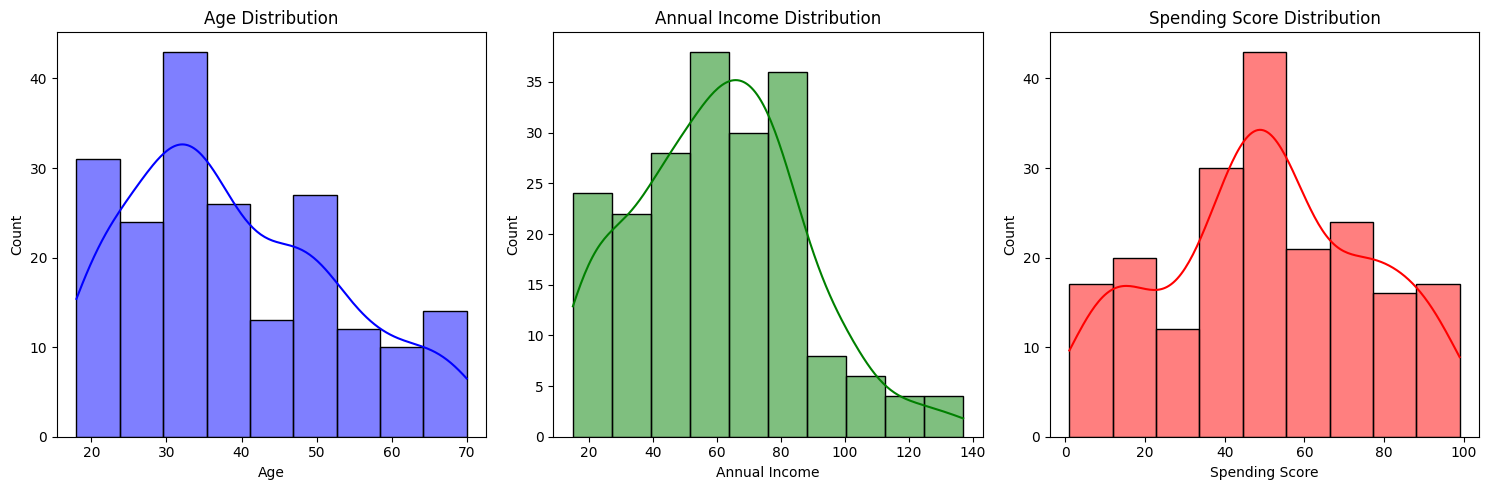

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(data['Annual Income'], kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(data['Spending Score'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Apply PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)


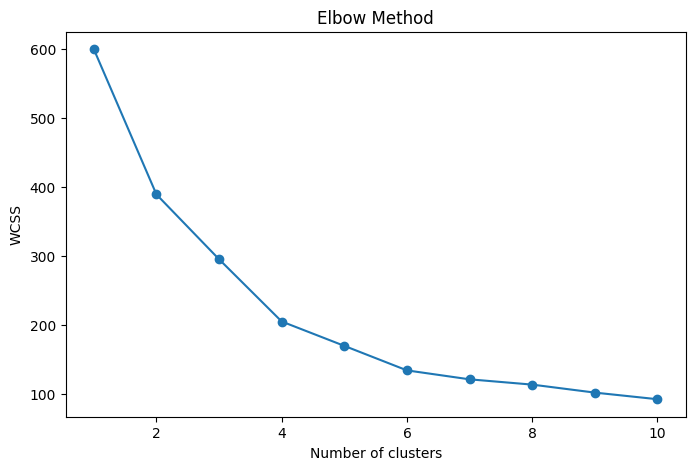

In [ ]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


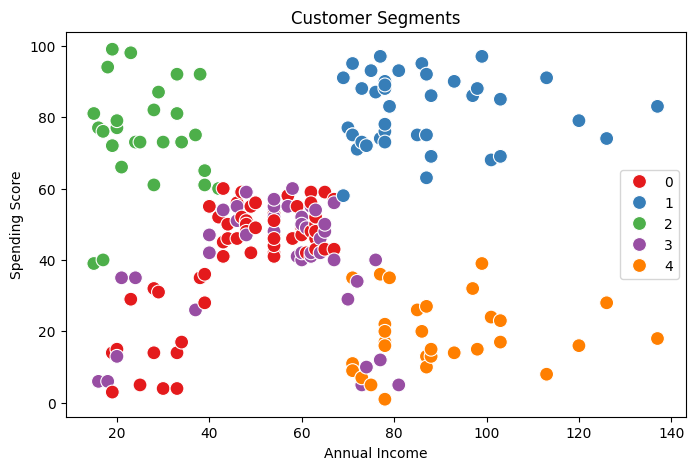

In [ ]:
# From Elbow plot, assume 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
data['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Annual Income'], y=data['Spending Score'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()



In [ ]:
# Cluster Profiles
cluster_profiles = data.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
print(cluster_profiles)

               Age  Annual Income  Spending Score
Cluster                                          
0        55.275862      47.620690       41.706897
1        32.875000      86.100000       81.525000
2        25.769231      26.115385       74.846154
3        26.733333      54.311111       40.911111
4        44.387097      89.774194       18.483871
